In [1]:
!pip install --quiet langgraph langchain langchain-aws opensearch-py

You should consider upgrading via the '/Users/akshseh/Desktop/repos/github_os/fashion-assistant-agent/.venv/bin/python3.10 -m pip install --upgrade pip' command.


In [1]:
import os
from random import randint

os.environ["embeddingSize"] = "1024"
os.environ["s3_bucket"] = "<>"
os.environ["aoss_host"] = "<>"
os.environ["index_name"] = "images-index"
os.environ["region_info"] = "<>"


In [2]:
LANGGRAPH_RECURSION_LIMIT = 10

In [27]:
from graph import graph
from langchain_core.messages import HumanMessage

In [28]:
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        print(message)
        if isinstance(message, tuple):
            print(message.content)
        else:
            message.pretty_print()

In [29]:
message = [HumanMessage(content="I am going to a wedding as a guest, the dress code is casual.. Can you recommend me something long that is pink in color?")]


In [38]:
state = graph.invoke(
    {"messages": message},
    config={
        "recursion_limit": LANGGRAPH_RECURSION_LIMIT,
        "configurable": {
            "thread_id": randint(1, 9999),
        },
    },
)


response:- content=[{'type': 'text', 'text': 'Here is a suggestion for a casual, long pink dress to wear as a guest to a wedding:', 'index': 0}, {'type': 'tool_use', 'id': 'toolu_bdrk_01EDbXR3zApU3SPYGvrwKDbz', 'name': 'get_image_gen', 'input': {}, 'index': 1, 'partial_json': '{"input_query": "A long, flowy pink maxi dress with spaghetti straps and a v-neckline. The dress has a high-low hemline that is longer in the back. The fabric is a lightweight chiffon material with a subtle floral print. Suitable for wearing as a guest to a casual outdoor wedding.", "weather": "None"}'}] additional_kwargs={} response_metadata={'stop_reason': 'tool_use', 'stop_sequence': None} id='run-5e0ca7d5-a692-418e-969e-46efde94fd04-0' tool_calls=[{'name': 'get_image_gen', 'args': {'input_query': 'A long, flowy pink maxi dress with spaghetti straps and a v-neckline. The dress has a high-low hemline that is longer in the back. The fabric is a lightweight chiffon material with a subtle floral print. Suitable fo

In [39]:
state["messages"][-1].content

's3://fashion-agent-824015345583-us-east-1/OutputImages/gen_image_309618.jpg'

In [40]:
import boto3
from PIL import Image
import io

def download_from_s3(bucket_name, key):
    """
    This function downloads the image from S3.
    """
    s3 = boto3.client("s3")
    response = s3.get_object(Bucket=bucket_name, Key=key)
    img_bytes = response["Body"].read()
    img = Image.open(io.BytesIO(img_bytes))
    return img



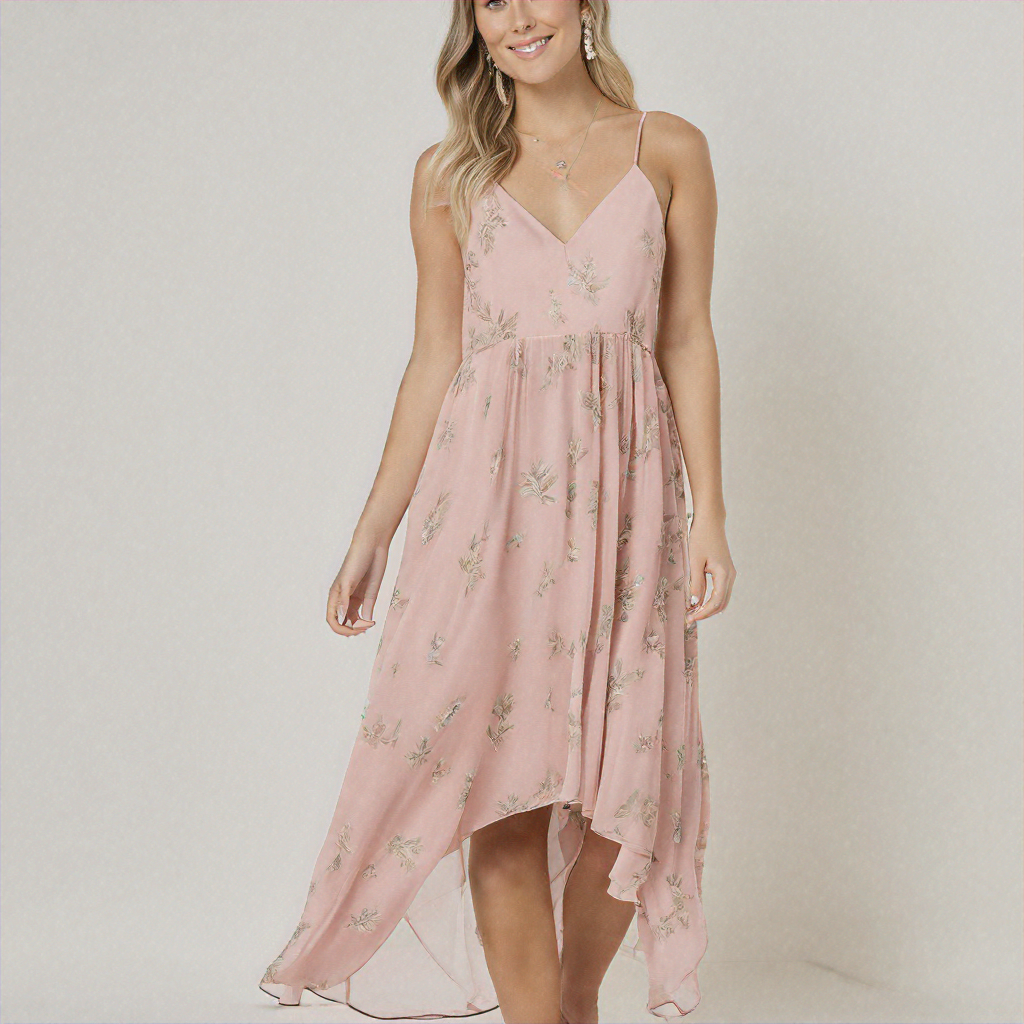

In [41]:
download_from_s3(os.environ["s3_bucket"],key="OutputImages/gen_image_966775.jpg")

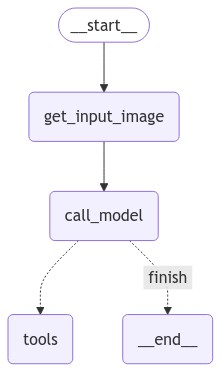

In [18]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass